<a href="https://colab.research.google.com/github/syedaftab-dev/Machine-learning/blob/main/2_logistic_roc_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression with ROC curve and ROC AUC score

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot

In [7]:
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
# generate a no skill prediction (majaority class) or dummmy model

dummy_model_prob = [0 for _ in range(len(y_test))]
print(dummy_model_prob)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
# prediction based on probabality
model_prob = model.predict_proba(X_test)

In [12]:
## lets focus on positive outcome
model_prob = model_prob[:,1];  # taking second column

In [13]:
# lets calculate the scores for dummy and real model
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)


0.5
0.907648


False Positive Rate:

formula = FP/N = FP/FP+TN

FP->no of false positives
TN->no of true negative

True Positive rate:

formula = TP/N = TP/TP+FN = 1 - FPR

if we plot TPR in y and FPR on x we will get ROC Curve


In [19]:
## calculate ROC curves

dummy_fpr,dummy_tpr, _ =roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr ,thresholds = roc_curve(y_test,model_prob)

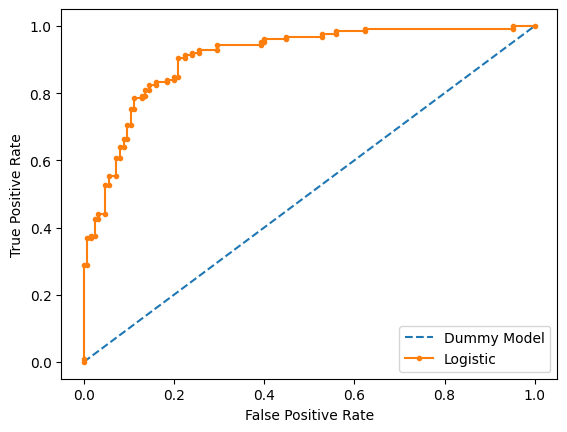

In [20]:
# plot the roc curve for the model

pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

what we got?

1. we got roc for dummmy and real model
2. the are under the curve defines the accuracy,the are for model is > dummy model, our model is performaned well
3. how to select the threshold by using the curve,while calculating the roc curve values the 3rd variable is threshold

In [21]:
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

by using threshold we can exammine the tpr and fpr
- note - where ever we have high TPR and less FPR that point is considered as threshold

/tmp/ipython-input-162098289.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


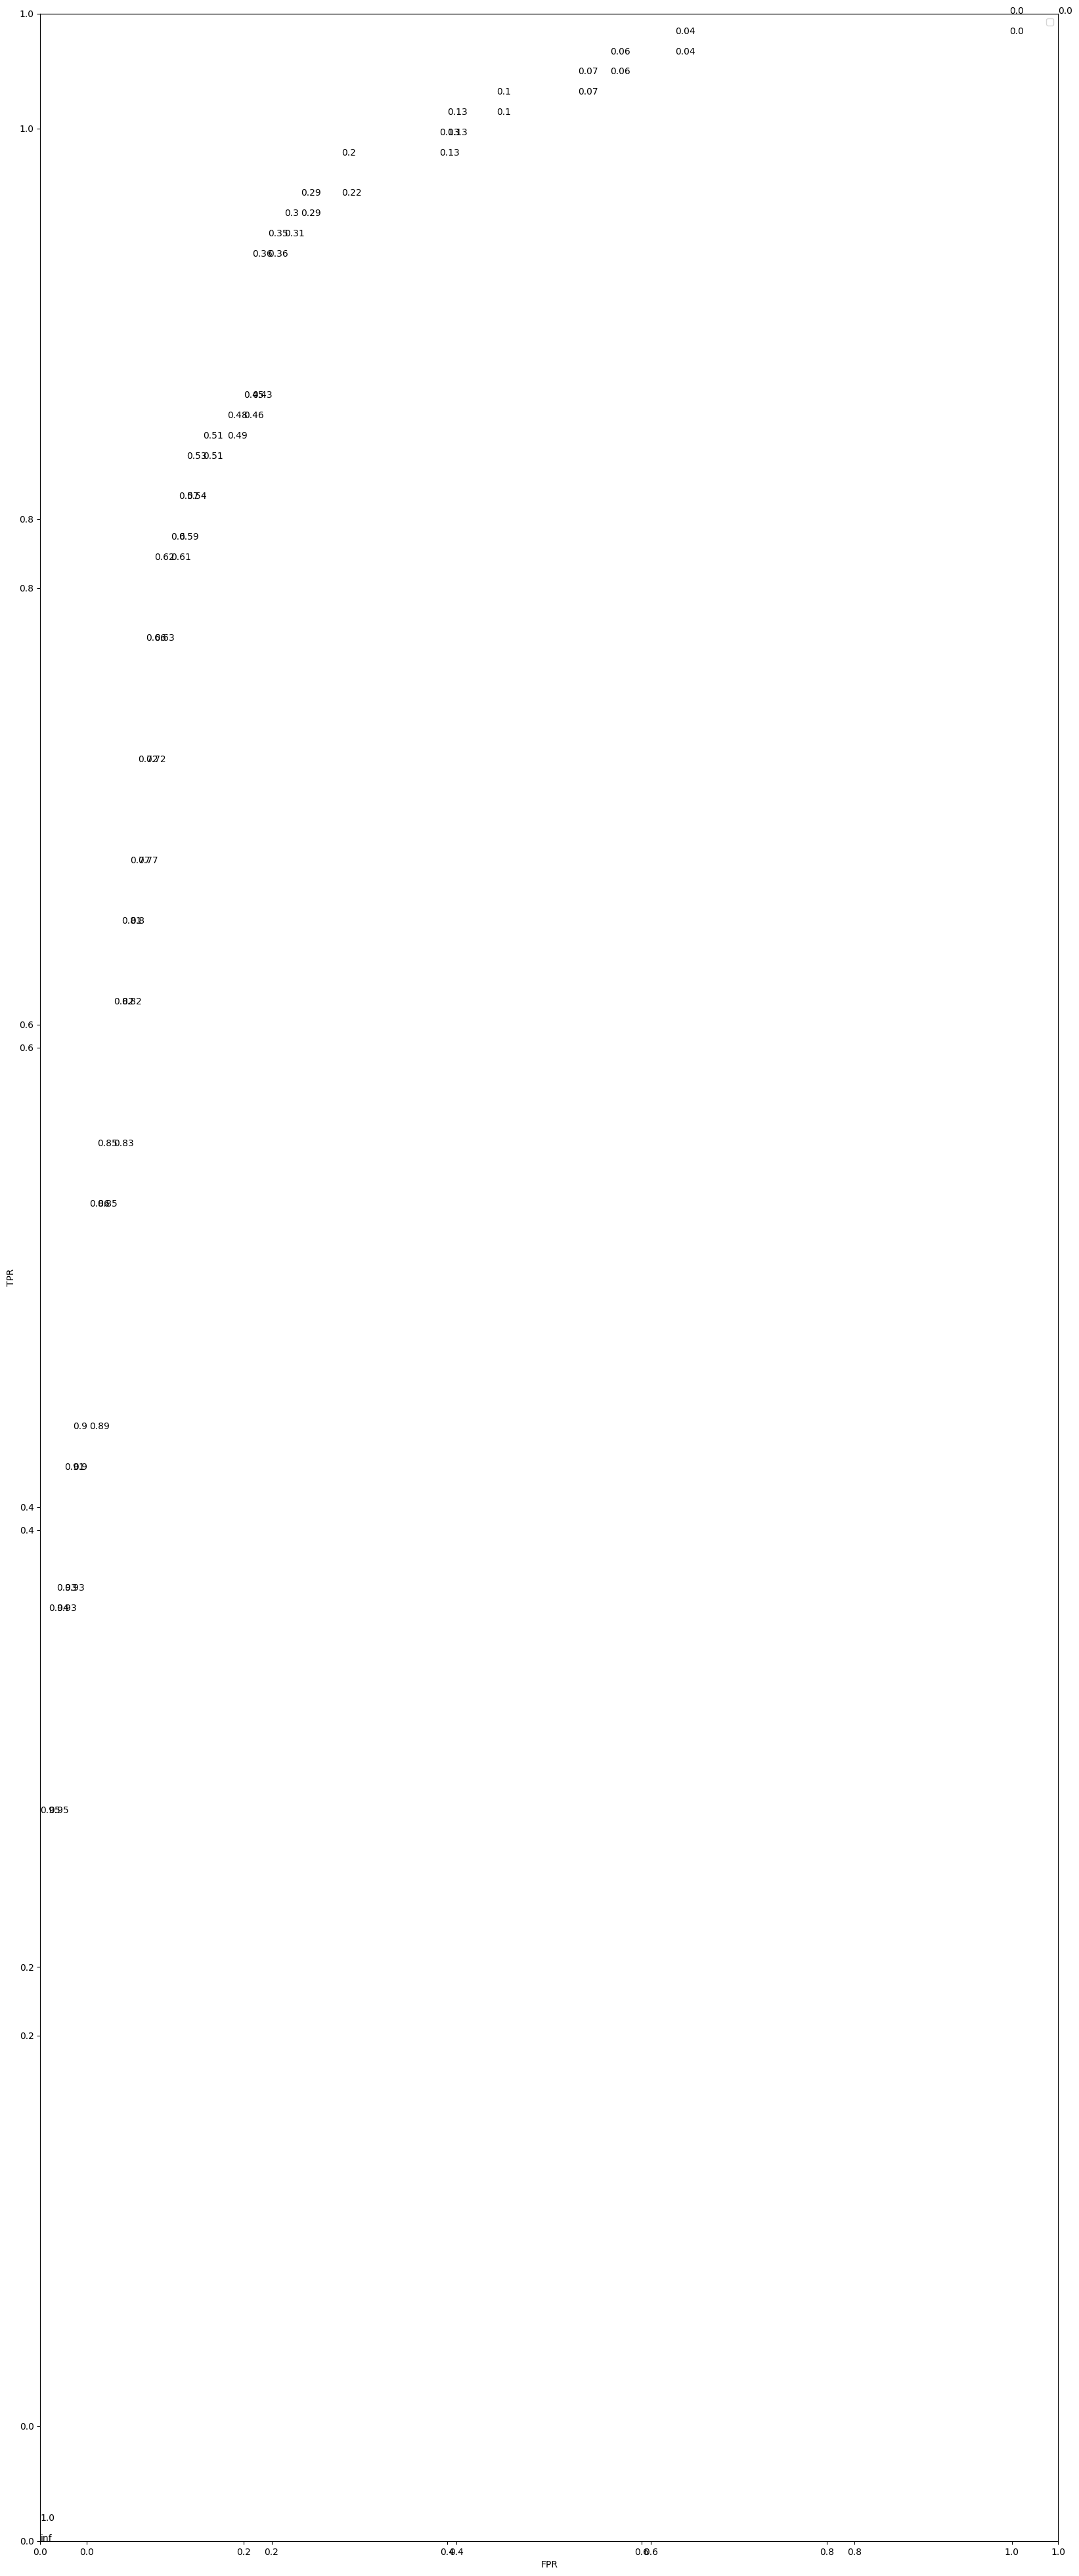

In [22]:
# plot the roc curve for model
import numpy as np

fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')

ax = fig.add_subplot(111)
# zip([1, 2, 3], ['a', 'b', 'c'], [4.0, 5.0, 6.0]) will produce an iterator yielding (1, 'a', 4.0), (2, 'b', 5.0), and (3, 'c', 6.0).
# annotate
for xyz in zip(model_fpr,model_tpr,thresholds):
  ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))

pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

pyplot.legend()
pyplot.show()